# Model Building and Evaluation

This module focuses on model building and diagnosis. 

In [1]:
import pandas as pd
import numpy as np
np.set_printoptions(threshold=np.inf)

#import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# This displays the [plots] in the boxes below the cells
%matplotlib inline


/Users/rajesh/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Read the cleaned dataset from disk.

In [2]:
ADS = pd.read_csv(r'./ADS_S.csv')
#print and check the content
ADS

,Unnamed: 0,Category,title
0,0,Amazon Launchpad,Watch Ya' Mouth Family Edition - The Authentic...
1,1,Amazon Launchpad,SmartyPants Kids Complete Gummy Vitamins: Mult...
2,2,Amazon Launchpad,Anova Culinary PCB-120US-K1 Bluetooth Precisio...
3,3,Amazon Launchpad,Joking Hazard
4,4,Amazon Launchpad,Tile Mate - Key Finder. Phone Finder. Anything...
5,5,Amazon Launchpad,"Soylent Ready to Drink Food, Original, 14 oz B..."
6,6,Amazon Launchpad,TubShroom The Revolutionary Tub Drain Protecto...
7,7,Amazon Launchpad,iOttie Easy One Touch 3 (V2.0) Car Mount Unive...
8,8,Amazon Launchpad,YETI Rambler Stainless Steel Vacuum Insulated ...
9,9,Amazon Launchpad,TubShroom The Revolutionary Tub Drain Protecto...


Frequency Distribution of Different Category.

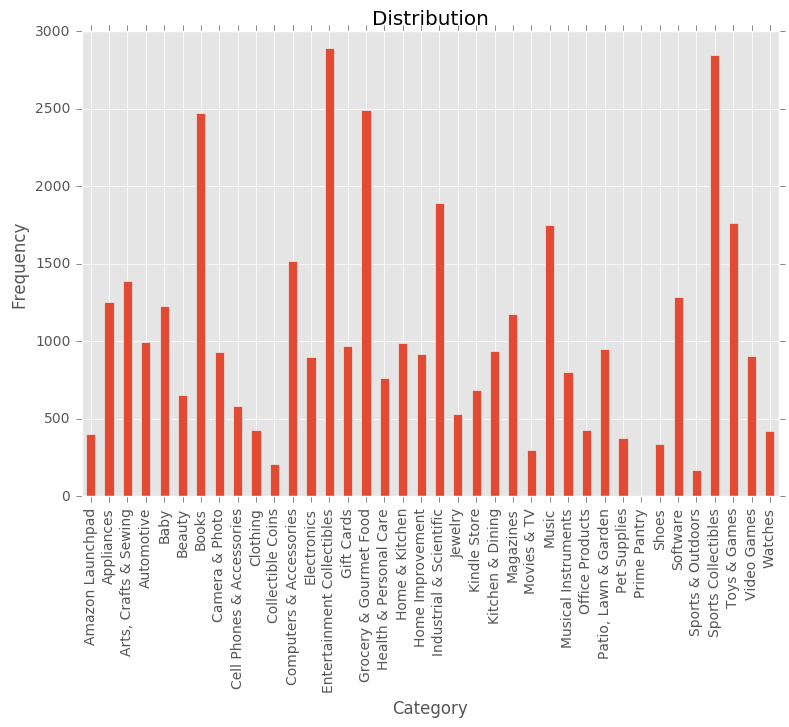

In [4]:
#Get frequency distribution of category
freq = ADS.groupby('Category').title.count()

fig = plt.figure(figsize=(9,6)) 

freq.plot(kind='bar')
plt.title('Distribution')
plt.xlabel('Category')
plt.ylabel('Frequency')

plt.show()

#ADS.Category.value_counts()

Removing "Prime Pantry" category, since there are only 6 listings available in the data. 

In [3]:
#dropping prime pantry
#Sports & Outdoors?
ADS = ADS[ADS.Category != 'Prime Pantry']
ADS.Category.value_counts()

Entertainment Collectibles    2890
Sports Collectibles           2850
Grocery & Gourmet Food        2492
Books                         2471
Industrial & Scientific       1892
Toys & Games                  1766
Music                         1750
Computers & Accessories       1518
Arts, Crafts & Sewing         1389
Software                      1289
Appliances                    1256
Baby                          1231
Magazines                     1176
Automotive                     998
Home & Kitchen                 987
Gift Cards                     968
Patio, Lawn & Garden           954
Kitchen & Dining               939
Camera & Photo                 930
Home Improvement               918
Video Games                    906
Electronics                    898
Musical Instruments            803
Health & Personal Care         762
Kindle Store                   686
Beauty                         654
Cell Phones & Accessories      584
Jewelry                        533
Office Products     

# Dividing the data into Training and Testing
<p></p>
<p>
<li> The data is divided into two samples with 70% of data for Training sample and 30% for testig.</li>
<li> Stratifed sampling technique is used, to maintain the proportions of categoires. </li>
</p>

In [4]:
from sklearn.cross_validation import train_test_split

text_train, text_test, y_train, y_test = train_test_split(ADS.title, ADS.Category, random_state=1340, test_size=0.30,\
                                                          stratify=ADS.Category)


Checking the sample sie of both train and test samples. 

In [5]:
print text_train.shape, y_train.shape
print text_test.shape, y_test.shape

(27696,) (27696,)
(11870,) (11870,)


Check the stratification.

In [6]:
fracs_test = y_train.value_counts()/y_train.shape*100
fracs_train = y_test.value_counts()/y_test.shape*100

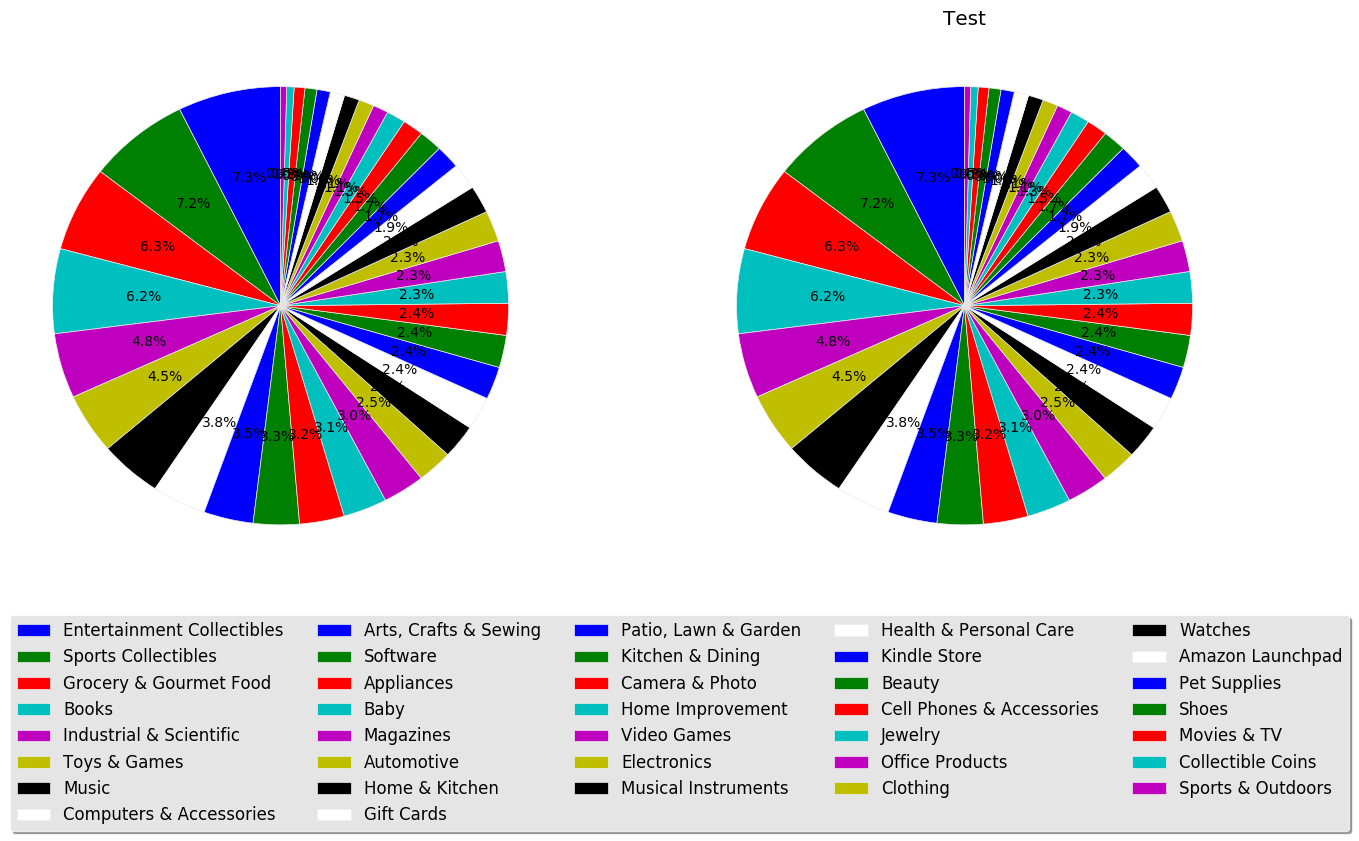

In [7]:
import numpy as np

plt.figure(1, figsize= (6,6))
#ax1 = fig.add_subplot(121)
#ax2 = fig.add_subplot(122)

# Plot
plt.pie(fracs_train,  autopct='%1.1f%%', 
        shadow=False, startangle=90, center = (-1.5,0))

plt.title('Test')

plt.figure(1, figsize= (6,6))

plt.pie(fracs_test, autopct='%1.1f%%', 
        shadow=False, startangle=90, center = (1.5,0))

#plt.title('Training dataset category distribution'+ \t  \\t Testing dataset category distribution')

plt.legend(y_train.value_counts().index, loc='upper center', bbox_to_anchor=(0, -0.05),
          fancybox=True, shadow=True, ncol=5)


plt.tight_layout()
plt.show()


#### Stemming function to be pased to TF-IDF Vectorizer

In [5]:
import nltk.stem 
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

english_stemmer = nltk.stem.SnowballStemmer('english')

#english_stemmer = EnglishStemmer.stemWords()

class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(CountVectorizer, self).build_analyzer()
        return lambda doc: (re.sub("[^a-zA-Z]", "", english_stemmer.stem(w)) for w in analyzer(doc))

class StemmedTfidfVectorizer(TfidfVectorizer):
    def build_analyzer(self):
        analyzer = super(TfidfVectorizer, self).build_analyzer()
        return lambda doc: (re.sub("[^a-zA-Z]", "", english_stemmer.stem(w)) for w in analyzer(doc))

#tfidf = StemmedTfidfVectorizer(min_df=1, stop_words='english', analyzer='word', ngram_range=(1,1))
#%timeit tfidf.fit_transform(X_train)

#### Helper function to predict accuracy and Class-wise accuracy

In [6]:
from sklearn.metrics import confusion_matrix, classification_report

def accuracy(true, pred):
    return (true == pred).sum() / float(true.shape[0])

def macro(true, pred):
    scores = []
    for l in np.unique(true):
        scores.append(accuracy(np.where(true != l, 1, 0),
                               np.where(pred != l, 1, 0)))
    return float(sum(scores)) / float(len(scores))

def confusionMatrixPlt(classifier):
    plt.matshow(confusion_matrix(y_test, classifier), cmap="Greens")
    plt.colorbar(shrink=1)
    plt.xlabel("Predicted label")
    plt.ylabel("True label");
    #plt.show()

def coeffMatrix(pipeline_fitted, vect, clf):
    col_names =  np.hstack(('intercept',pipeline_fitted.named_steps[vect].get_feature_names()))
    intercept_val =  pipeline_fitted.named_steps[clf].intercept_
    rest_col_values =  pipeline_fitted.named_steps[clf].coef_
    datas = np.hstack((intercept_val[:,None],rest_col_values))
    row_index = pipeline_fitted.classes_
    return pd.DataFrame(index = row_index, columns= col_names, data = datas)


def visualize_coefficients(pipeline_fitted, vect, clf, category, n_top_features=25):
    # get coefficients with large absolute values 
    labels = pipeline_fitted.classes_
    
    i = np.where(labels== category)
    coef = pipeline_fitted.named_steps[clf].coef_[i].ravel()
    positive_coefficients = np.argsort(coef)[ -n_top_features:]
    negative_coefficients = np.argsort(coef)[ :n_top_features]
    interesting_coefficients = np.hstack([negative_coefficients, positive_coefficients])
    # plot them
    plt.figure(figsize=(15, 5))
    colors = ["red" if c < 0 else "blue" for c in coef[interesting_coefficients]]
    plt.bar(np.arange(50), coef[interesting_coefficients], color=colors)
    feature_names = np.array(pipeline_fitted.named_steps[vect].get_feature_names())
    plt.xticks(np.arange(1, 51), feature_names[interesting_coefficients], rotation=60, ha="right")
    plt.title(labels[i].tolist()[0]);

### Create a pipeline for pre-processing (TD-IDF for the k-Folds before validating the hyper parameters)
Brute force for hyper parameter tuning [Underfitting vs Overfitting]

In [227]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

pipeline = make_pipeline(StemmedTfidfVectorizer(),\
                         LogisticRegression(solver='newton-cg', max_iter=50000, multi_class='multinomial'))

'''
params = {'logisticregression__C': [.001, .1, 1, 10, 100, 1000], \
          'logisticregression__penalty':['l2'], "stemmedtfidfvectorizer__ngram_range": [(1, 1), (1, 2), (2, 2)],\
          "stemmedtfidfvectorizer__stop_words": ['english',None]}
'''
#params = {"stemmedtfidfvectorizer__max_features": [100, 1000, 5000, 10000, 20000, 50000, None]}

params = {"stemmedtfidfvectorizer__max_features": [2000, 3000, 4000, 5000, None]}

grid = GridSearchCV(pipeline, param_grid=params, cv=3, verbose = 3, n_jobs=3) 
# scoring="roc_auc" used for unbalanced class
grid.fit(text_train, y_train)


Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] stemmedtfidfvectorizer__max_features=2000 .......................
[CV] stemmedtfidfvectorizer__max_features=2000 .......................
[CV] stemmedtfidfvectorizer__max_features=2000 .......................
[CV]  stemmedtfidfvectorizer__max_features=2000, score=0.695200 -  34.4s
[CV] stemmedtfidfvectorizer__max_features=3000 .......................
[CV]  stemmedtfidfvectorizer__max_features=2000, score=0.699329 -  36.1s
[CV] stemmedtfidfvectorizer__max_features=3000 .......................
[CV]  stemmedtfidfvectorizer__max_features=2000, score=0.702418 -  36.2s
[CV] stemmedtfidfvectorizer__max_features=3000 .......................
[CV]  stemmedtfidfvectorizer__max_features=3000, score=0.716959 -  38.7s
[CV] stemmedtfidfvectorizer__max_features=4000 .......................
[CV]  stemmedtfidfvectorizer__max_features=3000, score=0.716979 -  39.6s
[CV] stemmedtfidfvectorizer__max_features=4000 .......................
[CV]  s

[Parallel(n_jobs=3)]: Done  15 out of  15 | elapsed:  3.7min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(steps=[('stemmedtfidfvectorizer', StemmedTfidfVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
            dtype=<type 'numpy.int64'>, encoding=u'utf-8',
            input=u'content', lowercase=True, max_df=1.0,
            max_features=None, min_df=1, ngram_range=(1, 1), norm=u'l2...ty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=3,
       param_grid={'stemmedtfidfvectorizer__max_features': [2000, 3000, 4000, 5000, None]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=3)

In [229]:
print('best parameters:', grid.best_params_)
print('best score:', grid.best_score_)

grid_pred = grid.predict(text_test)

print classification_report(y_test, grid_pred)
print "****************"
print('accuracy:', accuracy(y_test, grid_pred))
print "****************"
print('average-per-class accuracy:', macro(y_test, grid_pred))

('best parameters:', {'stemmedtfidfvectorizer__max_features': None})
('best score:', 0.73396880415944543)
             precision    recall  f1-score   support

Amazon Launchpad       0.89      0.21      0.34       121
 Appliances       0.89      0.89      0.89       377
Arts, Crafts & Sewing       0.81      0.79      0.80       417
 Automotive       0.77      0.65      0.71       299
       Baby       0.83      0.77      0.80       369
     Beauty       0.80      0.68      0.74       196
      Books       0.65      0.89      0.75       741
Camera & Photo       0.85      0.88      0.87       279
Cell Phones & Accessories       0.84      0.86      0.85       175
   Clothing       0.83      0.89      0.86       129
Collectible Coins       1.00      0.89      0.94        62
Computers & Accessories       0.84      0.88      0.86       455
Electronics       0.66      0.61      0.63       269
Entertainment Collectibles       0.88      0.90      0.89       867
 Gift Cards       0.98      0.99 

# Multinomial Logistic Regression

In [21]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
#from sklearn.feature_selection import SelectKBest, chi2

log_pipeline = make_pipeline(StemmedTfidfVectorizer(ngram_range=(1,3), stop_words='english', max_features=None),
                             #SelectKBest(chi2,10000),
                             LogisticRegression(solver='newton-cg', max_iter=50000,class_weight= 'balanced',
                                                dual= False, fit_intercept= True, intercept_scaling= 1,
                                                multi_class='multinomial',n_jobs=1,penalty='l2', C=100))

%time log_pipeline.fit(text_train,y_train)
%time log = log_pipeline.score(text_train,y_train)
%time log_pred=log_pipeline.predict(text_test)


CPU times: user 33.8 s, sys: 1.05 s, total: 34.8 s
Wall time: 18min 8s
CPU times: user 28.3 s, sys: 275 ms, total: 28.6 s
Wall time: 28.5 s
CPU times: user 12 s, sys: 212 ms, total: 12.3 s
Wall time: 12.2 s


In [24]:
log_coef_df = coeffMatrix(log_pipeline, 'stemmedtfidfvectorizer', 'logisticregression')

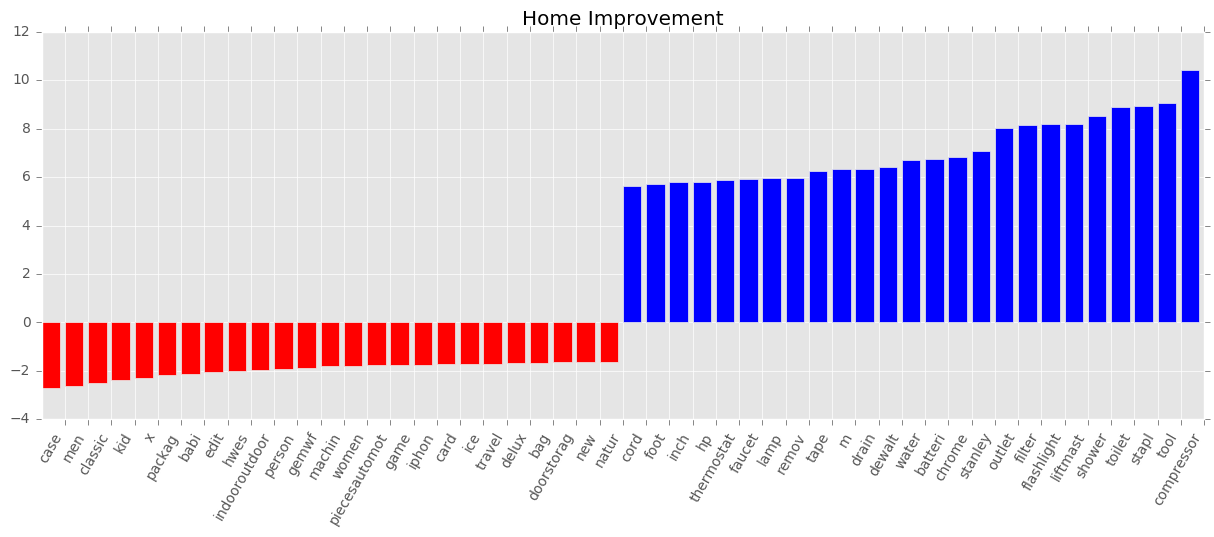

In [26]:
visualize_coefficients(log_pipeline,'stemmedtfidfvectorizer', 'logisticregression','Home Improvement')

###### Serialize the pipeline object and store it in disk for future use. 

In [23]:
from sklearn.externals import joblib
#pickle is an alternative
filename = "./Log_models.pkl"
joblib.dump(log_pipeline, filename, compress=9)

['./Log_models.pkl']

### Model Diagnostics

In [28]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_test, log_pred)

array([[ 68,   2,   0,   1,   1,   4,   1,   2,  10,   0,   0,   1,   4,
          1,   0,  12,   2,   1,   2,   2,   0,   0,   2,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   4,   1,   0],
       [  0, 340,   3,   0,   1,   3,   2,   1,   1,   0,   0,   0,   0,
          1,   0,   1,   2,   1,   9,   3,   0,   0,   7,   0,   0,   1,
          0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0],
       [  0,   1, 348,   2,   1,   4,   5,   0,   0,   1,   0,   1,   0,
          2,   0,   9,   0,   3,   3,  15,   7,   0,   0,   1,   0,   4,
          0,   2,   1,   0,   0,   3,   0,   0,   4,   0,   0],
       [  0,   0,   5, 211,   3,   3,   1,   1,   2,   0,   0,   2,   4,
          0,   0,   3,   2,  11,  12,  15,   0,   0,   1,   1,   0,   2,
          1,   0,  17,   1,   0,   1,   0,   0,   0,   0,   0],
       [  0,   0,   1,   1, 309,   3,   4,   1,   0,   1,   1,   0,   0,
          0,   0,   9,   5,   6,   4,   2,   0,   0,   2,   2,   0,   6,
          0,  

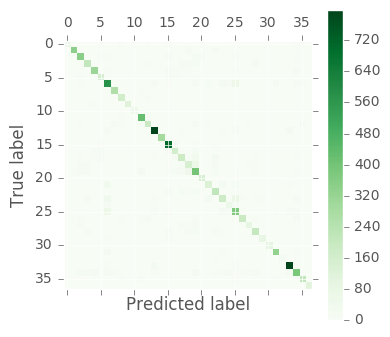

In [30]:
confusionMatrixPlt(log_pred)

In [22]:
print classification_report(y_test, log_pred)
print "****************"
print('accuracy:', accuracy(y_test, log_pred))
print "****************"
print('average-per-class accuracy:', macro(y_test, log_pred))

             precision    recall  f1-score   support

Amazon Launchpad       0.91      0.56      0.69       121
 Appliances       0.93      0.90      0.92       377
Arts, Crafts & Sewing       0.79      0.83      0.81       417
 Automotive       0.75      0.71      0.73       299
       Baby       0.85      0.84      0.84       369
     Beauty       0.72      0.78      0.75       196
      Books       0.73      0.78      0.75       741
Camera & Photo       0.88      0.94      0.91       279
Cell Phones & Accessories       0.81      0.95      0.87       175
   Clothing       0.81      0.90      0.85       129
Collectible Coins       0.95      0.95      0.95        62
Computers & Accessories       0.86      0.93      0.89       455
Electronics       0.79      0.70      0.74       269
Entertainment Collectibles       0.92      0.92      0.92       867
 Gift Cards       1.00      0.99      0.99       290
Grocery & Gourmet Food       0.86      0.94      0.90       748
Health & Personal Care

In [46]:
from sklearn.cross_validation import cross_val_score, StratifiedKFold
cvscore = cross_val_score(log_pipeline, ADS.title, ADS.Category, cv=3, n_jobs=-1, verbose=3)
cvscore

array([ 0.58649693,  0.60789813,  0.57915908])

In [61]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, chi2

log_pipeline1 = make_pipeline(StemmedTfidfVectorizer(ngram_range=(1,3), stop_words='english', max_features=None),
                             SelectKBest(chi2,10000),
                             LogisticRegression(solver='newton-cg', max_iter=50000,class_weight= 'balanced',
                                                dual= False, fit_intercept= True, intercept_scaling= 1,
                                                multi_class='multinomial',n_jobs=1,penalty='l2', C=100))

%time log_pipeline1.fit(text_train,y_train)
%time log1 = log_pipeline1.score(text_train,y_train)
%time log_pred1=log_pipeline1.predict(text_test)

CPU times: user 3min 12s, sys: 19.8 s, total: 3min 32s
Wall time: 2min 6s
CPU times: user 29.8 s, sys: 510 ms, total: 30.3 s
Wall time: 30.1 s
CPU times: user 12.8 s, sys: 143 ms, total: 12.9 s
Wall time: 13 s


In [62]:
print classification_report(y_test, log_pred1)
print "****************"
print('accuracy:', accuracy(y_test, log_pred1))
print "****************"
print('average-per-class accuracy:', macro(y_test, log_pred1))

             precision    recall  f1-score   support

Amazon Launchpad       0.50      0.53      0.51       121
 Appliances       0.90      0.91      0.90       377
Arts, Crafts & Sewing       0.74      0.80      0.77       417
 Automotive       0.59      0.63      0.61       299
       Baby       0.76      0.75      0.75       369
     Beauty       0.64      0.70      0.67       196
      Books       0.76      0.57      0.65       741
Camera & Photo       0.85      0.90      0.88       279
Cell Phones & Accessories       0.81      0.90      0.85       175
   Clothing       0.80      0.89      0.84       129
Collectible Coins       0.97      0.94      0.95        62
Computers & Accessories       0.83      0.88      0.86       455
Electronics       0.71      0.67      0.69       269
Entertainment Collectibles       0.91      0.87      0.89       867
 Gift Cards       1.00      0.98      0.99       290
Grocery & Gourmet Food       0.88      0.88      0.88       748
Health & Personal Care

In [37]:
from sklearn.cross_validation import cross_val_score, StratifiedKFold
cvscore1 = cross_val_score(log_pipeline1, ADS.title, ADS.Category, cv=3, n_jobs=-1, verbose=3)
cvscore1

[CV] no parameters to be set .........................................
[CV] no parameters to be set .........................................
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.552793 - 2.8min
[CV] ................ no parameters to be set, score=0.539010 - 2.9min
[CV] ................ no parameters to be set, score=0.522922 - 3.1min


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  3.1min finished


array([ 0.52292188,  0.55279315,  0.53901032])

# Naive Bayes

In [16]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

nb_pipeline = make_pipeline(StemmedCountVectorizer(ngram_range=(1,2), stop_words='english', max_features=20000),\
                            MultinomialNB())
%time nb_pipeline.fit(text_train,y_train)
%time nb=nb_pipeline.score(text_train,y_train)
%time nb_pred=nb_pipeline.predict(text_test)



CPU times: user 22.4 s, sys: 340 ms, total: 22.7 s
Wall time: 23 s
CPU times: user 20.1 s, sys: 230 ms, total: 20.3 s
Wall time: 20.4 s
CPU times: user 9.01 s, sys: 113 ms, total: 9.12 s
Wall time: 9.2 s


In [ ]:
from sklearn.externals import joblib
filename = "./NBmodels.pkl"
joblib.dump(nb_pipeline, filename, compress=9)

#sum(x==0 for x in pred - y_test)/len(pred)

In [218]:
nb_coef_df = coeffMatrix(nb_pipeline, 'stemmedcountfvectorizer', 'multinomialnb')

,intercept,,a,aa,aaa,aaaaa,aaabatteri,aaaqual,aaarecharg,aabatteri,...,zupreem,zupreemfruit,zus,zw,zwsisu,zx,zxe,zxehigh,zxuy,zz
Amazon Launchpad,-4.583596,-5.663252,-9.343763,-10.442376,-10.442376,-10.442376,-10.442376,-10.442376,-10.442376,-10.442376,...,-10.442376,-10.442376,-9.343763,-10.442376,-10.442376,-10.442376,-10.442376,-10.442376,-10.442376,-10.442376
Appliances,-3.450258,-3.847097,-8.444235,-10.053673,-10.746820,-10.746820,-10.746820,-10.746820,-10.746820,-10.746820,...,-10.746820,-10.746820,-10.746820,-10.746820,-10.746820,-10.746820,-10.746820,-10.746820,-10.746820,-10.746820
"Arts, Crafts & Sewing",-3.349687,-3.828641,-8.623398,-10.702840,-10.702840,-10.702840,-10.702840,-10.702840,-10.702840,-10.702840,...,-10.702840,-10.702840,-10.702840,-10.702840,-10.702840,-10.702840,-10.702840,-10.702840,-9.316546,-10.702840
Automotive,-3.679393,-3.855223,-7.332466,-10.628303,-8.682393,-10.628303,-10.628303,-10.628303,-10.628303,-10.628303,...,-10.628303,-10.628303,-10.628303,-9.935156,-10.628303,-10.628303,-9.529691,-9.529691,-10.628303,-10.628303
Baby,-3.469788,-4.725784,-8.693377,-10.639287,-10.639287,-10.639287,-10.639287,-10.639287,-10.639287,-10.639287,...,-10.639287,-10.639287,-10.639287,-10.639287,-10.639287,-10.639287,-10.639287,-10.639287,-10.639287,-10.639287
Beauty,-4.102174,-5.004079,-10.537468,-10.537468,-9.844321,-10.537468,-10.537468,-10.537468,-10.537468,-10.537468,...,-10.537468,-10.537468,-10.537468,-10.537468,-10.537468,-10.537468,-10.537468,-10.537468,-10.537468,-10.537468
Books,-2.773167,-4.930567,-9.973993,-10.667140,-10.667140,-10.667140,-10.667140,-10.667140,-10.667140,-10.667140,...,-10.667140,-10.667140,-10.667140,-10.667140,-10.667140,-10.667140,-10.667140,-10.667140,-10.667140,-10.667140
Camera & Photo,-3.750534,-4.730051,-8.603852,-8.891534,-9.073856,-9.990147,-10.683294,-10.683294,-9.584682,-9.990147,...,-10.683294,-10.683294,-10.683294,-10.683294,-10.683294,-10.683294,-10.683294,-10.683294,-10.683294,-10.683294
Cell Phones & Accessories,-4.215328,-5.632885,-8.606956,-10.552866,-10.552866,-10.552866,-10.552866,-10.552866,-10.552866,-10.552866,...,-10.552866,-10.552866,-10.552866,-10.552866,-10.552866,-10.552866,-10.552866,-10.552866,-10.552866,-10.552866
Clothing,-4.525261,-6.452474,-10.403717,-10.403717,-10.403717,-10.403717,-10.403717,-10.403717,-10.403717,-10.403717,...,-10.403717,-10.403717,-10.403717,-10.403717,-10.403717,-10.403717,-10.403717,-10.403717,-10.403717,-10.403717


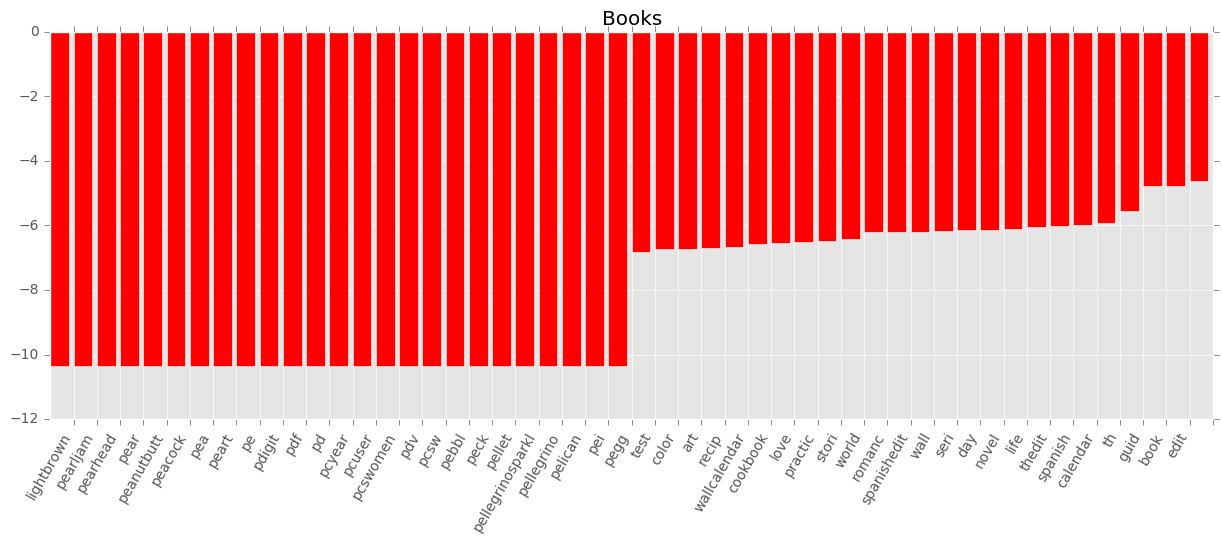

In [17]:
visualize_coefficients(nb_pipeline,'stemmedcountvectorizer', 'multinomialnb','Books')

### Model Diagnostics 

In [68]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_test, nb_pred)

array([[ 13,   1,   2, ...,   9,   1,   0],
       [  0, 335,   2, ...,   0,   0,   0],
       [  0,   1, 334, ...,   4,   0,   0],
       ..., 
       [  0,   1,  15, ..., 332,   0,   0],
       [  0,   2,   0, ...,   9, 162,   0],
       [  0,   0,   0, ...,  15,   1,  74]])

In [29]:
confusionMatrixPlt(nb_pred)

NameError: name 'nb_pred' is not defined

In [18]:
print classification_report(y_test, nb_pred)
print "****************"
print('accuracy:', accuracy(y_test, nb_pred))
print "****************"
print('average-per-class accuracy:', macro(y_test, nb_pred))

             precision    recall  f1-score   support

Amazon Launchpad       0.94      0.26      0.40       121
 Appliances       0.84      0.87      0.86       377
Arts, Crafts & Sewing       0.68      0.83      0.75       417
 Automotive       0.69      0.69      0.69       299
       Baby       0.76      0.78      0.77       369
     Beauty       0.70      0.67      0.69       196
      Books       0.65      0.81      0.72       741
Camera & Photo       0.79      0.91      0.85       279
Cell Phones & Accessories       0.76      0.87      0.81       175
   Clothing       0.87      0.86      0.87       129
Collectible Coins       1.00      0.95      0.98        62
Computers & Accessories       0.76      0.89      0.82       455
Electronics       0.60      0.70      0.64       269
Entertainment Collectibles       0.64      0.95      0.77       867
 Gift Cards       0.96      1.00      0.98       290
Grocery & Gourmet Food       0.75      0.97      0.84       748
Health & Personal Care

# Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier

rf_pipeline = make_pipeline(StemmedTfidfVectorizer(ngram_range=(1,2), stop_words='english', max_features=5000),\
                         RandomForestClassifier(n_estimators= 1000))

'''
RandomForestClassifier(bootstrap= True, class_weight= None, criterion= 'gini',max_depth= 100, max_leaf_nodes=100, min_samples_leaf= 1,min_samples_split= 1, min_weight_fraction_leaf= 0, n_estimators= 100, n_jobs= -1, oob_score= False, random_state= None, verbose= 1, warm_start=True)
'''

%time rf_pipeline.fit(text_train,y_train)
%time rf=rf_pipeline.score(text_train,y_train)
%time rf_pred=rf_pipeline.predict(text_test)

CPU times: user 10min 35s, sys: 8.95 s, total: 10min 44s
Wall time: 10min 50s
CPU times: user 58.3 s, sys: 16.2 s, total: 1min 14s
Wall time: 1min 19s
CPU times: user 26.5 s, sys: 9.54 s, total: 36 s
Wall time: 39.2 s


In [59]:
rf_pipeline.named_steps['randomforestclassifier']

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [ ]:
from sklearn.externals import joblib
filename = "./RFmodels.pkl"
joblib.dump(rf_pipeline, filename, compress=9)

### Model Diagnostics

In [47]:
print classification_report(y_test, rf_pred)
print "****************"
print('accuracy:', accuracy(y_test, rf_pred))
print "****************"
print('average-per-class accuracy:', macro(y_test, rf_pred))

             precision    recall  f1-score   support

Amazon Launchpad       0.85      0.43      0.57       121
 Appliances       0.92      0.86      0.89       377
Arts, Crafts & Sewing       0.76      0.69      0.73       417
 Automotive       0.78      0.60      0.67       299
       Baby       0.77      0.71      0.74       369
     Beauty       0.72      0.54      0.61       196
      Books       0.69      0.71      0.70       741
Camera & Photo       0.87      0.92      0.89       279
Cell Phones & Accessories       0.83      0.87      0.85       175
   Clothing       0.75      0.88      0.81       129
Collectible Coins       0.92      0.98      0.95        62
Computers & Accessories       0.86      0.89      0.88       455
Electronics       0.77      0.61      0.68       269
Entertainment Collectibles       0.94      0.89      0.91       867
 Gift Cards       0.99      0.99      0.99       290
Grocery & Gourmet Food       0.72      0.91      0.81       748
Health & Personal Care

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import TruncatedSVD

rf_pipeline = make_pipeline(StemmedTfidfVectorizer(ngram_range=(1,2), stop_words='english'),\
                            TruncatedSVD(),\
                            RandomForestClassifier())
'''
RandomForestClassifier(bootstrap= True, class_weight= None, criterion= 'gini',max_depth= 100, max_leaf_nodes=100, min_samples_leaf= 1,min_samples_split= 1, min_weight_fraction_leaf= 0, n_estimators= 100, n_jobs= -1, oob_score= False, random_state= None, verbose= 1, warm_start=True)
'''
params = {"stemmedtfidfvectorizer__max_features":[15000],\
          "randomforestclassifier__n_estimators": [10000],\
          "randomforestclassifier__max_depth": [None] }

grid_rf_pipeline = GridSearchCV(rf_pipeline, param_grid=params, cv=3, verbose = 3, n_jobs=1) 


%time grid_rf_pipeline.fit(text_train,y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] randomforestclassifier__n_estimators=1000, randomforestclassifier__max_depth=None, stemmedtfidfvectorizer__max_features=15000 
[CV] randomforestclassifier__n_estimators=1000, randomforestclassifier__max_depth=None, stemmedtfidfvectorizer__max_features=15000 
[CV] randomforestclassifier__n_estimators=1000, randomforestclassifier__max_depth=None, stemmedtfidfvectorizer__max_features=15000 
[CV] randomforestclassifier__n_estimators=10000, randomforestclassifier__max_depth=None, stemmedtfidfvectorizer__max_features=15000 
[CV]  randomforestclassifier__n_estimators=1000, randomforestclassifier__max_depth=None, stemmedtfidfvectorizer__max_features=15000, score=0.705494 -15.0min
[CV]  randomforestclassifier__n_estimators=1000, randomforestclassifier__max_depth=None, stemmedtfidfvectorizer__max_features=15000, score=0.712829 -15.0min
[CV]  randomforestclassifier__n_estimators=1000, randomforestclassifier__max_depth=None, stemmedtf

# K Nearest Neighbour

In [21]:
from sklearn.neighbors import KNeighborsClassifier

kn_pipeline = make_pipeline(StemmedTfidfVectorizer(ngram_range=(1,2), stop_words='english', max_features=5000),\
                         KNeighborsClassifier(neighbors=5))
 
%time kn_pipeline.fit(text_train,y_train)
%time kn=kn_pipeline.score(text_train,y_train)
%time kn_pred=kn_pipeline.predict(text_test)


/Users/rajesh/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: DeprecationWarning: Passing additional arguments to the metric function as **kwargs is deprecated and will no longer be supported in 0.18. Use metric_params instead.
  app.launch_new_instance()


CPU times: user 20.6 s, sys: 219 ms, total: 20.8 s
Wall time: 20.8 s
CPU times: user 58.8 s, sys: 1min 50s, total: 2min 48s
Wall time: 6min 1s
CPU times: user 21.1 s, sys: 19.2 s, total: 40.4 s
Wall time: 49.1 s


In [ ]:
from sklearn.externals import joblib
filename = "./KNmodels.pkl"
joblib.dump(kn_pipeline, filename, compress=9)

### Model Diagnostics

In [22]:
print classification_report(y_test, kn_pred)
print "****************"
print('accuracy:', accuracy(y_test, kn_pred))
print "****************"
print('average-per-class accuracy:', macro(y_test, kn_pred))

             precision    recall  f1-score   support

Amazon Launchpad       0.47      0.36      0.41       121
 Appliances       0.89      0.77      0.82       377
Arts, Crafts & Sewing       0.74      0.55      0.63       417
 Automotive       0.68      0.46      0.55       299
       Baby       0.77      0.60      0.68       369
     Beauty       0.69      0.42      0.52       196
      Books       0.38      0.58      0.46       741
Camera & Photo       0.90      0.73      0.81       279
Cell Phones & Accessories       0.87      0.71      0.78       175
   Clothing       0.84      0.59      0.69       129
Collectible Coins       0.88      0.71      0.79        62
Computers & Accessories       0.88      0.69      0.77       455
Electronics       0.82      0.48      0.60       269
Entertainment Collectibles       0.89      0.65      0.75       867
 Gift Cards       0.97      1.00      0.98       290
Grocery & Gourmet Food       0.82      0.77      0.80       748
Health & Personal Care

# Support Vectror Machine

In [25]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

sv_pipeline = make_pipeline(StemmedTfidfVectorizer(ngram_range=(1,2), stop_words='english', max_features=5000),\
                            LinearSVC())

%time sv_pipeline.fit(text_train,y_train)
%time sv=sv_pipeline.score(text_train,y_train)
%time sv_pred=sv_pipeline.predict(text_test)


In [ ]:
from sklearn.externals import joblib
filename = "./SVmodels.pkl"
joblib.dump(sv_pipeline, filename, compress=9)

### Model Diagnostics

In [26]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print classification_report(y_test, sv_pred)
print "****************"
print('accuracy:', accuracy(y_test, sv_pred))
print "****************"
print('average-per-class accuracy:', macro(y_test, sv_pred))

             precision    recall  f1-score   support

Amazon Launchpad       0.73      0.40      0.52       121
 Appliances       0.92      0.90      0.91       377
Arts, Crafts & Sewing       0.80      0.79      0.80       417
 Automotive       0.71      0.64      0.68       299
       Baby       0.82      0.76      0.78       369
     Beauty       0.73      0.76      0.74       196
      Books       0.70      0.76      0.73       741
Camera & Photo       0.85      0.92      0.89       279
Cell Phones & Accessories       0.83      0.89      0.86       175
   Clothing       0.80      0.91      0.86       129
Collectible Coins       0.95      0.98      0.97        62
Computers & Accessories       0.86      0.89      0.88       455
Electronics       0.73      0.67      0.70       269
Entertainment Collectibles       0.92      0.89      0.90       867
 Gift Cards       0.99      0.99      0.99       290
Grocery & Gourmet Food       0.82      0.95      0.88       748
Health & Personal Care

# Gradient Boosting Classifier

In [26]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import FunctionTransformer
from sklearn.decomposition import TruncatedSVD
import numpy as np
   
gb_pipeline = make_pipeline(StemmedTfidfVectorizer(ngram_range=(1,1), stop_words='english'), 
                            TruncatedSVD(n_components=120),
                         GradientBoostingClassifier( init= None, learning_rate= 0.6,\
                                                    loss= 'deviance', max_depth= 5, max_leaf_nodes= 4,\
                                                    min_samples_leaf= 1, min_samples_split= 1, min_weight_fraction_leaf= 0.0,\
                                                    n_estimators= 1000, random_state= None,\
                                                    subsample= 1.0, verbose=1, warm_start= False))
                         
gb_pipeline.fit(text_train.values,y_train)
gb=gb_pipeline.score(text_train.values, y_train)
gb_pred=gb_pipeline.predict(text_test.values)

from sklearn.externals import joblib
filename = "./GBoostmodels.pkl"
joblib.dump(gb_pipeline, filename, compress=9)

      Iter       Train Loss   Remaining Time 
         1      907332.5804          241.48m
         2 12863641630907348847029998877409280.0000          237.75m
         3 12863641630907348847029998877409280.0000          236.60m
         4 12863641630907348847029998877409280.0000          236.10m
         5 12863641630907348847029998877409280.0000          235.46m
         6 12863641630907348847029998877409280.0000          235.26m
         7 12863641630907348847029998877409280.0000          234.82m
         8 12863641630907348847029998877409280.0000          234.68m
         9 12863641630907348847029998877409280.0000          234.29m
        10 12863641630907348847029998877409280.0000          234.01m
        20 12863641630907348847029998877409280.0000          230.91m
        30 12863641630907348847029998877409280.0000          228.36m
        40 12863641630907348847029998877409280.0000          225.81m
        50 12863641630907348847029998877409280.0000          223.55m
        60 1

['./GBoostmodels.pkl']

### Model Diagnostics

In [27]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print classification_report(y_test, gb_pred)
print "****************"
print('accuracy:', accuracy(y_test, gb_pred))
print "****************"
print('average-per-class accuracy:', macro(y_test, gb_pred))

             precision    recall  f1-score   support

Amazon Launchpad       0.00      0.00      0.00       121
 Appliances       0.00      0.00      0.00       377
Arts, Crafts & Sewing       0.00      0.00      0.00       417
 Automotive       0.03      1.00      0.05       299
       Baby       0.00      0.00      0.00       369
     Beauty       0.00      0.00      0.00       196
      Books       0.00      0.00      0.00       741
Camera & Photo       0.00      0.00      0.00       279
Cell Phones & Accessories       0.00      0.00      0.00       175
   Clothing       0.00      0.00      0.00       129
Collectible Coins       0.00      0.00      0.00        62
Computers & Accessories       0.00      0.00      0.00       455
Electronics       0.00      0.00      0.00       269
Entertainment Collectibles       0.00      0.00      0.00       867
 Gift Cards       0.00      0.00      0.00       290
Grocery & Gourmet Food       0.00      0.00      0.00       748
Health & Personal Care

#### GBC is very slow. Lets use XGBoost

# XGBoost

In [42]:
import xgboost as xgb

xgb_pipeline = make_pipeline(StemmedTfidfVectorizer(ngram_range=(1,2), stop_words='english', max_features=5000),\
                             xgb.XGBClassifier(n_estimators=1000))
                         
%time xgb_pipeline.fit(text_train.values,y_train)
%time xgb=xgb_pipeline.score(text_train.values, y_train)
%time xgb_pred=xgb_pipeline.predict(text_test.values)

CPU times: user 28min 53s, sys: 7.85 s, total: 29min 1s
Wall time: 29min 12s
CPU times: user 7min 45s, sys: 2.02 s, total: 7min 47s
Wall time: 7min 50s
CPU times: user 3min 20s, sys: 1.01 s, total: 3min 21s
Wall time: 3min 22s


In [43]:
print classification_report(y_test, xgb_pred)
print "****************"
print('accuracy:', accuracy(y_test, xgb_pred))
print "****************"
print('average-per-class accuracy:', macro(y_test, xgb_pred))

             precision    recall  f1-score   support

Amazon Launchpad       0.62      0.39      0.48       121
 Appliances       0.92      0.89      0.91       377
Arts, Crafts & Sewing       0.79      0.72      0.75       417
 Automotive       0.71      0.61      0.65       299
       Baby       0.82      0.74      0.78       369
     Beauty       0.75      0.66      0.70       196
      Books       0.69      0.69      0.69       741
Camera & Photo       0.89      0.92      0.90       279
Cell Phones & Accessories       0.86      0.87      0.86       175
   Clothing       0.75      0.82      0.78       129
Collectible Coins       0.95      0.87      0.91        62
Computers & Accessories       0.87      0.87      0.87       455
Electronics       0.74      0.62      0.67       269
Entertainment Collectibles       0.92      0.88      0.90       867
 Gift Cards       0.99      0.99      0.99       290
Grocery & Gourmet Food       0.80      0.92      0.85       748
Health & Personal Care

# Selecting the best Classifier

In [48]:
import numpy as np

ss2=[nb,xgb,kn,log,sv,rf]
algos=["NaiveB", "xgBoost", "KNN", "Logit", "SVM", "Rand Forest"]

best=[int(i) for i in np.where(ss2==max(ss2))[0]]
best2=[]
for i in best:
    best2.append([algos[i],round(ss2[i],4)])

s2 = pd.Series( ss2, index = ["NaiveB", "xgBoost", "KNN","Logistic","SVM","Rand Forest"])

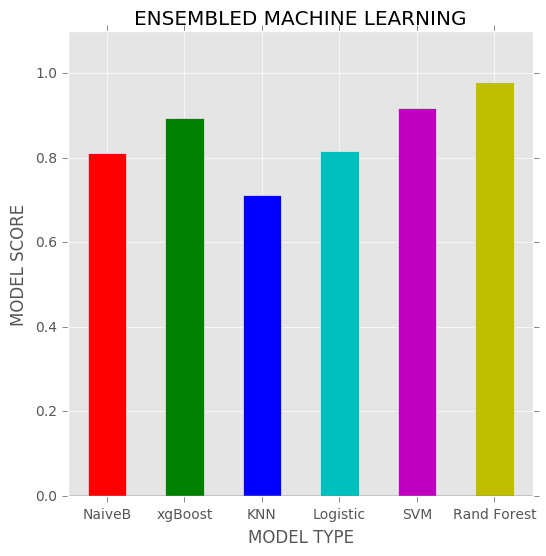

('BEST MODELS:', [['Rand Forest', 0.9797]])


In [49]:
plt.figure(figsize=(6,6))
plt.title("ENSEMBLED MACHINE LEARNING")
plt.ylabel('MODEL SCORE')
plt.xlabel('MODEL TYPE')
my_colors = 'rgbcmyk'
s2.plot( kind='bar', color=my_colors)
plt.axhline(0, color='black')
plt.xticks(rotation=0)
plt.ylim(0,1.1)
plt.show()

print('BEST MODELS:',best2) 

# Feature Selection

### Choose K best Chi2 features

In [50]:
from sklearn.feature_selection import f_classif, f_regression, chi2

F, p = chi2(StemmedTfidfVectorizer(ngram_range=(1,2), stop_words='english', max_features=None).fit_transform(text_train),\
            y_train)
#plt.figure()
#plt.plot(p, 'o')

In [58]:
len(p[np.where(p<=0.05)])

5931

In [18]:
#np.sort(F[np.where(p<=0.05)])
len(F[np.where(F>=51.01)])

5931

### Backward Elimination Method

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import RFE, SelectKBest, chi2

rfe_log_pipeline = make_pipeline(StemmedTfidfVectorizer(ngram_range=(1,3), stop_words='english', max_features=None),\
                                 SelectKBest(chi2,6000),
                                 RFE(LogisticRegression(multi_class='multinomial',solver='newton-cg'),
                                     n_features_to_select=1000))

%time rfe_log_pipeline.fit(text_train,y_train)
%time rfe_log = rfe_log_pipeline.score(text_train,y_train)
%time rfe_log_pred=rfe_log_pipeline.predict(text_test)



In [ ]:
print classification_report(y_test, rfe_log_pred)
print "****************"
print('accuracy:', accuracy(y_test, rfe_log_pred))
print "****************"
print('average-per-class accuracy:', macro(y_test, rfe_log_pred))

### Text Preprocessing

In [11]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_selection import RFE

del kbest_svc_pipeline

kbest_svc_pipeline = make_pipeline(StemmedTfidfVectorizer(ngram_range=(1,2), stop_words='english', max_features=None),
                                   TruncatedSVD(n_components=5000),
                                   LogisticRegression(multi_class='multinomial', C=100, solver='newton-cg'))


#SelectKBest(chi2, k = 26052),
#params = {"onevsrestclassifier__estimator__C": [0.001, 0.1, 1, 10, 100, 1000]}
#grid_ovr_xbg_svc_pipeline = GridSearchCV(ovr_xbg_svc_pipeline, param_grid=params, cv=3, verbose = 3, n_jobs=-1) 


%time kbest_svc_pipeline.fit(text_train,y_train)
%time kbest_svc = kbest_svc_pipeline.score(text_train,y_train)
%time kbest_svc_pred=kbest_svc_pipeline.predict(text_test)



CPU times: user 1h 26min 11s, sys: 1h 33min 41s, total: 2h 59min 53s
Wall time: 6h 25min 30s
CPU times: user 33.7 s, sys: 2min 54s, total: 3min 27s
Wall time: 17min 16s
CPU times: user 19 s, sys: 55 s, total: 1min 14s
Wall time: 5min 14s


In [12]:
print classification_report(y_test, kbest_svc_pred)
print "****************"
print('accuracy:', accuracy(y_test, kbest_svc_pred))
print "****************"
print('average-per-class accuracy:', macro(y_test, kbest_svc_pred))

             precision    recall  f1-score   support

Amazon Launchpad       0.75      0.50      0.60       121
 Appliances       0.92      0.89      0.90       377
Arts, Crafts & Sewing       0.79      0.83      0.81       417
 Automotive       0.70      0.69      0.69       299
       Baby       0.82      0.79      0.80       369
     Beauty       0.73      0.76      0.74       196
      Books       0.71      0.77      0.74       741
Camera & Photo       0.91      0.92      0.92       279
Cell Phones & Accessories       0.89      0.89      0.89       175
   Clothing       0.85      0.91      0.88       129
Collectible Coins       0.95      0.95      0.95        62
Computers & Accessories       0.86      0.91      0.89       455
Electronics       0.73      0.68      0.71       269
Entertainment Collectibles       0.91      0.92      0.91       867
 Gift Cards       1.00      0.98      0.99       290
Grocery & Gourmet Food       0.88      0.93      0.91       748
Health & Personal Care

# Random Forest as input to Logistic

In [14]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, chi2, SelectPercentile, SelectFromModel
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
#from sklearn.multiclass import OneVsRestClassifier

fs_log_pipeline = make_pipeline(StemmedTfidfVectorizer(ngram_range=(1,2), stop_words='english', max_features=None),
                             SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42), threshold="median"),
                             LogisticRegression(solver='newton-cg', max_iter=50000,class_weight= 'balanced',
                                                dual= False, fit_intercept= True, intercept_scaling= 1,
                                                multi_class='multinomial',n_jobs=-1,penalty='l2', C=100))

%time fs_log_pipeline.fit(text_train,y_train)
%time fs_log = fs_log_pipeline.score(text_train,y_train)
%time fs_log_pred=fs_log_pipeline.predict(text_test)

NameError: name 'RandomForestClassifier' is not defined

In [63]:
print classification_report(y_test, fs_log_pred)
print "****************"
print('accuracy:', accuracy(y_test, fs_log_pred))
print "****************"
print('average-per-class accuracy:', macro(y_test, fs_log_pred))

             precision    recall  f1-score   support

Amazon Launchpad       0.75      0.54      0.62       121
 Appliances       0.93      0.82      0.87       377
Arts, Crafts & Sewing       0.75      0.75      0.75       417
 Automotive       0.66      0.68      0.67       299
       Baby       0.80      0.75      0.78       369
     Beauty       0.62      0.76      0.68       196
      Books       0.73      0.72      0.72       741
Camera & Photo       0.83      0.92      0.87       279
Cell Phones & Accessories       0.75      0.92      0.82       175
   Clothing       0.71      0.92      0.80       129
Collectible Coins       0.95      1.00      0.98        62
Computers & Accessories       0.89      0.86      0.88       455
Electronics       0.66      0.67      0.66       269
Entertainment Collectibles       0.91      0.84      0.87       867
 Gift Cards       0.98      1.00      0.99       290
Grocery & Gourmet Food       0.83      0.89      0.86       748
Health & Personal Care

# XGBoost as an input to Logistic

In [14]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, chi2, SelectPercentile, SelectFromModel
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
#from sklearn.multiclass import OneVsRestClassifier

xbg_log_pipeline = make_pipeline(StemmedTfidfVectorizer(ngram_range=(1,2), stop_words='english', max_features=None),
                             SelectFromModel(xgb.XGBClassifier(n_estimators=100), threshold="median"),
                             LogisticRegression(solver='newton-cg', max_iter=50000,class_weight= 'balanced',
                                                dual= False, fit_intercept= True, intercept_scaling= 1,
                                                multi_class='multinomial',n_jobs=-1,penalty='l2', C=1))

%time xbg_log_pipeline.fit(text_train,y_train)
%time xgb_log = xbg_log_pipeline.score(text_train,y_train)
%time xgb_log_pred=xbg_log_pipeline.predict(text_test)

CPU times: user 8min 17s, sys: 1.46 s, total: 8min 19s
Wall time: 9min 58s
CPU times: user 19.5 s, sys: 239 ms, total: 19.7 s
Wall time: 19.6 s
CPU times: user 8.85 s, sys: 88.7 ms, total: 8.94 s
Wall time: 8.93 s


In [17]:
print classification_report(y_test, xgb_log_pred)
print "****************"
print('accuracy:', accuracy(y_test, xgb_log_pred))
print "****************"
print('average-per-class accuracy:', macro(y_test, xgb_log_pred))

             precision    recall  f1-score   support

Amazon Launchpad       0.77      0.56      0.65       121
 Appliances       0.92      0.83      0.87       377
Arts, Crafts & Sewing       0.76      0.75      0.75       417
 Automotive       0.67      0.69      0.68       299
       Baby       0.81      0.76      0.79       369
     Beauty       0.62      0.75      0.68       196
      Books       0.74      0.72      0.73       741
Camera & Photo       0.83      0.93      0.88       279
Cell Phones & Accessories       0.75      0.93      0.83       175
   Clothing       0.71      0.92      0.80       129
Collectible Coins       0.97      1.00      0.98        62
Computers & Accessories       0.89      0.87      0.88       455
Electronics       0.66      0.67      0.66       269
Entertainment Collectibles       0.90      0.84      0.87       867
 Gift Cards       0.99      1.00      0.99       290
Grocery & Gourmet Food       0.84      0.89      0.86       748
Health & Personal Care

# XGBoost with OneVsRest Classifier with Logistic + CountVectorizer

In [21]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
import xgboost as xgb

ovr_xbg_log_pipeline = make_pipeline(StemmedCountVectorizer(ngram_range=(1,2), stop_words='english', max_features=None),
                             SelectFromModel(xgb.XGBClassifier(n_estimators=100), threshold="median"),
                             OneVsRestClassifier(LogisticRegression(solver='newton-cg', max_iter=50000,class_weight= 'balanced',
                                                dual= False, fit_intercept= True, intercept_scaling= 1,
                                                multi_class='multinomial',n_jobs=-1,penalty='l2', C=1)))

%time ovr_xbg_log_pipeline.fit(text_train,y_train)
%time ovr_xgb_log = ovr_xbg_log_pipeline.score(text_train,y_train)
%time ovr_xgb_log_pred=ovr_xbg_log_pipeline.predict(text_test)

CPU times: user 7min 24s, sys: 3.16 s, total: 7min 27s
Wall time: 9min 51s
CPU times: user 20.9 s, sys: 295 ms, total: 21.2 s
Wall time: 21.2 s
CPU times: user 9.63 s, sys: 158 ms, total: 9.78 s
Wall time: 9.79 s


In [22]:
print classification_report(y_test, ovr_xgb_log_pred)
print "****************"
print('accuracy:', accuracy(y_test, ovr_xgb_log_pred))
print "****************"
print('average-per-class accuracy:', macro(y_test, ovr_xgb_log_pred))

             precision    recall  f1-score   support

Amazon Launchpad       0.84      0.56      0.67       121
 Appliances       0.96      0.89      0.92       377
Arts, Crafts & Sewing       0.85      0.80      0.82       417
 Automotive       0.83      0.71      0.76       299
       Baby       0.88      0.78      0.83       369
     Beauty       0.80      0.78      0.79       196
      Books       0.78      0.75      0.76       741
Camera & Photo       0.91      0.92      0.91       279
Cell Phones & Accessories       0.90      0.90      0.90       175
   Clothing       0.86      0.91      0.88       129
Collectible Coins       1.00      0.97      0.98        62
Computers & Accessories       0.90      0.88      0.89       455
Electronics       0.78      0.66      0.71       269
Entertainment Collectibles       0.97      0.88      0.92       867
 Gift Cards       0.99      0.99      0.99       290
Grocery & Gourmet Food       0.87      0.95      0.91       748
Health & Personal Care

# RandomForest with OneVsRest Classifier with SVC + Count

In [23]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
import xgboost as xgb

ovr_rf_svc_pipeline = make_pipeline(StemmedCountVectorizer(ngram_range=(1,2), stop_words='english', max_features=None),
                             SelectFromModel(RandomForestClassifier(n_estimators=100), threshold="median"),
                             OneVsRestClassifier(LinearSVC()))

%time ovr_rf_svc_pipeline.fit(text_train,y_train)
%time ovr_rf_svc = ovr_rf_svc_pipeline.score(text_train,y_train)
%time ovr_rf_svc_pred=ovr_rf_svc_pipeline.predict(text_test)

CPU times: user 6min 11s, sys: 2.46 s, total: 6min 14s
Wall time: 6min 15s
CPU times: user 19.2 s, sys: 342 ms, total: 19.5 s
Wall time: 19.4 s
CPU times: user 8.54 s, sys: 267 ms, total: 8.8 s
Wall time: 8.69 s


In [24]:
print classification_report(y_test, ovr_xgb_svc_pred)
print "****************"
print('accuracy:', accuracy(y_test, ovr_xgb_svc_pred))
print "****************"
print('average-per-class accuracy:', macro(y_test, ovr_xgb_svc_pred))

             precision    recall  f1-score   support

Amazon Launchpad       0.85      0.55      0.66       121
 Appliances       0.95      0.90      0.92       377
Arts, Crafts & Sewing       0.83      0.81      0.82       417
 Automotive       0.82      0.69      0.75       299
       Baby       0.86      0.80      0.83       369
     Beauty       0.75      0.79      0.77       196
      Books       0.77      0.76      0.77       741
Camera & Photo       0.90      0.93      0.91       279
Cell Phones & Accessories       0.86      0.91      0.88       175
   Clothing       0.84      0.91      0.88       129
Collectible Coins       0.90      0.98      0.94        62
Computers & Accessories       0.87      0.88      0.88       455
Electronics       0.73      0.66      0.69       269
Entertainment Collectibles       0.96      0.88      0.92       867
 Gift Cards       0.99      0.99      0.99       290
Grocery & Gourmet Food       0.87      0.95      0.91       748
Health & Personal Care

# RandomForest with OneVsRest Classifier with SVC + TDIDF

In [26]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
import xgboost as xgb

ovr_xbg_svc_pipeline = make_pipeline(StemmedTfidfVectorizer(ngram_range=(1,2), stop_words='english', max_features=None),
                             SelectFromModel(RandomForestClassifier(n_estimators=100), threshold="median"),
                             OneVsRestClassifier(LinearSVC()))

%time ovr_xbg_svc_pipeline.fit(text_train,y_train)
%time ovr_xgb_svc = ovr_xbg_svc_pipeline.score(text_train,y_train)
%time ovr_xgb_svc_pred=ovr_xbg_svc_pipeline.predict(text_test)

CPU times: user 5min, sys: 1.25 s, total: 5min 2s
Wall time: 5min 2s
CPU times: user 34.6 s, sys: 228 ms, total: 34.8 s
Wall time: 34.8 s
CPU times: user 20.4 s, sys: 522 ms, total: 20.9 s
Wall time: 21.2 s


In [27]:
print classification_report(y_test, ovr_xgb_svc_pred)
print "****************"
print('accuracy:', accuracy(y_test, ovr_xgb_svc_pred))
print "****************"
print('average-per-class accuracy:', macro(y_test, ovr_xgb_svc_pred))

             precision    recall  f1-score   support

Amazon Launchpad       0.90      0.53      0.67       121
 Appliances       0.93      0.91      0.92       377
Arts, Crafts & Sewing       0.80      0.84      0.82       417
 Automotive       0.79      0.73      0.76       299
       Baby       0.85      0.83      0.84       369
     Beauty       0.76      0.82      0.79       196
      Books       0.74      0.82      0.78       741
Camera & Photo       0.86      0.95      0.90       279
Cell Phones & Accessories       0.87      0.93      0.90       175
   Clothing       0.81      0.92      0.86       129
Collectible Coins       0.95      1.00      0.98        62
Computers & Accessories       0.87      0.92      0.89       455
Electronics       0.73      0.71      0.72       269
Entertainment Collectibles       0.89      0.92      0.90       867
 Gift Cards       0.99      1.00      0.99       290
Grocery & Gourmet Food       0.83      0.97      0.89       748
Health & Personal Care

# RandomForest with OneVsRestClassifier with Naive Bayes + count Vectorizer

In [29]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
import xgboost as xgb

ovr_rf_nb_pipeline = make_pipeline(StemmedCountVectorizer(ngram_range=(1,2), stop_words='english', max_features=None),
                             SelectFromModel(RandomForestClassifier(n_estimators=100), threshold="median"),
                             MultinomialNB())

%time ovr_rf_nb_pipeline.fit(text_train,y_train)
%time ovr_rf_nb = ovr_rf_nb_pipeline.score(text_train,y_train)
%time ovr_rf_nb_pred=ovr_rf_nb_pipeline.predict(text_test)

CPU times: user 5min 35s, sys: 1.56 s, total: 5min 37s
Wall time: 5min 37s
CPU times: user 19.1 s, sys: 307 ms, total: 19.4 s
Wall time: 19.3 s
CPU times: user 8.45 s, sys: 217 ms, total: 8.66 s
Wall time: 8.61 s


In [30]:
print classification_report(y_test, ovr_rf_nb_pred)
print "****************"
print('accuracy:', accuracy(y_test, ovr_rf_nb_pred))
print "****************"
print('average-per-class accuracy:', macro(y_test, ovr_rf_nb_pred))

             precision    recall  f1-score   support

Amazon Launchpad       0.97      0.23      0.37       121
 Appliances       0.81      0.90      0.85       377
Arts, Crafts & Sewing       0.70      0.82      0.75       417
 Automotive       0.73      0.67      0.70       299
       Baby       0.78      0.79      0.79       369
     Beauty       0.75      0.64      0.69       196
      Books       0.66      0.81      0.73       741
Camera & Photo       0.82      0.92      0.87       279
Cell Phones & Accessories       0.80      0.87      0.83       175
   Clothing       0.89      0.84      0.86       129
Collectible Coins       1.00      0.87      0.93        62
Computers & Accessories       0.69      0.95      0.80       455
Electronics       0.64      0.67      0.66       269
Entertainment Collectibles       0.60      0.96      0.74       867
 Gift Cards       0.96      1.00      0.98       290
Grocery & Gourmet Food       0.71      0.98      0.82       748
Health & Personal Care

# XGboost with Logistic

In [10]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
#from sklearn.multiclass import OneVsRestClassifier
import xgboost as xgb

xbg_log_pipeline = make_pipeline(StemmedTfidfVectorizer(ngram_range=(1,3), stop_words='english', max_features=None),
                             SelectFromModel(xgb.XGBClassifier(n_estimators=1000), threshold="median"),
                             LogisticRegression(solver='newton-cg',multi_class='multinomial', penalty='l2', C=1))

%time xbg_log_pipeline.fit(text_train,y_train)
%time xgb_log = xbg_log_pipeline.score(text_train,y_train)
%time xgb_log_pred=xbg_log_pipeline.predict(text_test)

CPU times: user 2h 22min 18s, sys: 2min, total: 2h 24min 18s
Wall time: 2h 21min 18s
CPU times: user 30.6 s, sys: 456 ms, total: 31.1 s
Wall time: 31 s
CPU times: user 15 s, sys: 316 ms, total: 15.3 s
Wall time: 15.2 s


In [11]:
print classification_report(y_test, xgb_log_pred)
print "****************"
print('accuracy:', accuracy(y_test, xgb_log_pred))
print "****************"
print('average-per-class accuracy:', macro(y_test, xgb_log_pred))

             precision    recall  f1-score   support

Amazon Launchpad       0.95      0.15      0.26       121
 Appliances       0.88      0.88      0.88       377
Arts, Crafts & Sewing       0.73      0.76      0.75       417
 Automotive       0.73      0.54      0.62       299
       Baby       0.79      0.78      0.79       369
     Beauty       0.78      0.47      0.59       196
      Books       0.52      0.87      0.65       741
Camera & Photo       0.89      0.90      0.90       279
Cell Phones & Accessories       0.74      0.87      0.80       175
   Clothing       0.76      0.78      0.77       129
Collectible Coins       0.98      0.82      0.89        62
Computers & Accessories       0.76      0.92      0.83       455
Electronics       0.72      0.59      0.65       269
Entertainment Collectibles       0.81      0.91      0.86       867
 Gift Cards       0.98      0.98      0.98       290
Grocery & Gourmet Food       0.68      0.95      0.79       748
Health & Personal Care

/Users/rajesh/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# RF with Logistic

In [12]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
#from sklearn.multiclass import OneVsRestClassifier
#from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
#from sklearn.grid_search import GridSearchCV
#from sklearn.decomposition import TruncatedSVD


rf_log_pipeline = make_pipeline(StemmedTfidfVectorizer(ngram_range=(1,3), stop_words='english', max_features=None),
                                SelectFromModel(RandomForestClassifier(n_estimators=1000), threshold="median"),
                                LogisticRegression(solver='newton-cg',multi_class='multinomial', penalty='l2', C=1)
                               )

%time rf_log_pipeline.fit(text_train,y_train)
%time rf_log = rf_log_pipeline.score(text_train,y_train)
%time rf_log_pred=rf_log_pipeline.predict(text_test)

CPU times: user 1h 56min 41s, sys: 1min 5s, total: 1h 57min 46s
Wall time: 1h 55min 37s
CPU times: user 33.8 s, sys: 9.58 s, total: 43.4 s
Wall time: 45.9 s
CPU times: user 17.5 s, sys: 8.79 s, total: 26.3 s
Wall time: 28.1 s


In [13]:
print classification_report(y_test, rf_log_pred)
print "****************"
print('accuracy:', accuracy(y_test, rf_log_pred))
print "****************"
print('average-per-class accuracy:', macro(y_test, rf_log_pred))

             precision    recall  f1-score   support

Amazon Launchpad       0.95      0.15      0.26       121
 Appliances       0.87      0.88      0.87       377
Arts, Crafts & Sewing       0.72      0.75      0.74       417
 Automotive       0.72      0.53      0.61       299
       Baby       0.79      0.78      0.79       369
     Beauty       0.77      0.47      0.59       196
      Books       0.51      0.86      0.64       741
Camera & Photo       0.89      0.89      0.89       279
Cell Phones & Accessories       0.75      0.87      0.80       175
   Clothing       0.75      0.78      0.76       129
Collectible Coins       0.98      0.84      0.90        62
Computers & Accessories       0.75      0.92      0.83       455
Electronics       0.72      0.59      0.65       269
Entertainment Collectibles       0.80      0.92      0.85       867
 Gift Cards       0.98      0.98      0.98       290
Grocery & Gourmet Food       0.68      0.95      0.79       748
Health & Personal Care

# Xgboost with OVR+Logistic

In [14]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
import xgboost as xgb

ovr_xbg_log_pipeline = make_pipeline(StemmedTfidfVectorizer(ngram_range=(1,3), stop_words='english', max_features=None),
                                     SelectFromModel(xgb.XGBClassifier(n_estimators=1000), threshold="median"),
                                     OneVsRestClassifier(LogisticRegression(solver='newton-cg',multi_class='multinomial', penalty='l2', C=1))
                                    )

%time ovr_xbg_log_pipeline.fit(text_train,y_train)
%time ovr_xgb_log = ovr_xbg_log_pipeline.score(text_train,y_train)
%time ovr_xgb_log_pred=ovr_xbg_log_pipeline.predict(text_test)

CPU times: user 2h 18min 2s, sys: 1min 16s, total: 2h 19min 19s
Wall time: 2h 17min 39s
CPU times: user 31.1 s, sys: 443 ms, total: 31.6 s
Wall time: 31.1 s
CPU times: user 15.2 s, sys: 397 ms, total: 15.6 s
Wall time: 15.4 s


In [15]:
print classification_report(y_test, ovr_xgb_log_pred)
print "****************"
print('accuracy:', accuracy(y_test, ovr_xgb_log_pred))
print "****************"
print('average-per-class accuracy:', macro(y_test, ovr_xgb_log_pred))

             precision    recall  f1-score   support

Amazon Launchpad       0.94      0.27      0.42       121
 Appliances       0.88      0.90      0.89       377
Arts, Crafts & Sewing       0.73      0.78      0.75       417
 Automotive       0.74      0.59      0.66       299
       Baby       0.81      0.80      0.80       369
     Beauty       0.74      0.59      0.66       196
      Books       0.57      0.86      0.69       741
Camera & Photo       0.90      0.92      0.91       279
Cell Phones & Accessories       0.77      0.91      0.83       175
   Clothing       0.77      0.85      0.81       129
Collectible Coins       0.98      0.94      0.96        62
Computers & Accessories       0.79      0.93      0.85       455
Electronics       0.75      0.62      0.68       269
Entertainment Collectibles       0.87      0.92      0.89       867
 Gift Cards       0.98      0.99      0.98       290
Grocery & Gourmet Food       0.73      0.95      0.83       748
Health & Personal Care

# RF with ovc + Logistic

In [16]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
#from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
#from sklearn.grid_search import GridSearchCV
#from sklearn.decomposition import TruncatedSVD


ovc_rf_log_pipeline = make_pipeline(StemmedTfidfVectorizer(ngram_range=(1,3), stop_words='english', max_features=None),
                                SelectFromModel(RandomForestClassifier(n_estimators=1000), threshold="median"),
                                OneVsRestClassifier(LogisticRegression(solver='newton-cg',multi_class='multinomial', penalty='l2', C=1))
                               )

%time ovc_rf_log_pipeline.fit(text_train,y_train)
%time ovc_rf_log = ovc_rf_log_pipeline.score(text_train,y_train)
%time ovc_rf_log_pred=ovc_rf_log_pipeline.predict(text_test)

KeyboardInterrupt: 

In [17]:
print classification_report(y_test, ovc_rf_log_pred)
print "****************"
print('accuracy:', accuracy(y_test, ovc_rf_log_pred))
print "****************"
print('average-per-class accuracy:', macro(y_test, ovc_rf_log_pred))

NameError: name 'ovc_rf_log_pred' is not defined

# Experiments

In [7]:
from sklearn.pipeline import make_pipeline
#from sklearn.decomposition import PCA
#from sklearn.decomposition import TruncatedSVD
#from sklearn.linear_model import LogisticRegression
#from sklearn.svm import LinearSVC
#from sklearn.feature_selection import SelectKBest,chi2, SelectFromModel, VarianceThreshold
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
#import xgboost as xgb

#del exp_pipeline

exp_pipeline = make_pipeline(StemmedCountVectorizer(ngram_range=(1,3), stop_words='english', max_features=None),\
                             MultinomialNB())
                             #TruncatedSVD(n_components=100),
                             #LinearSVC())
                             #OneVsRestClassifier(LogisticRegression(solver='newton-cg', multi_class='multinomial', C =1)))

%time exp_pipeline.fit(text_train,y_train)
%time exp = exp_pipeline.score(text_train,y_train)
%time exp_pred =exp_pipeline.predict(text_test)

CPU times: user 30.1 s, sys: 414 ms, total: 30.5 s
Wall time: 30.5 s
CPU times: user 29.1 s, sys: 205 ms, total: 29.3 s
Wall time: 29.4 s
CPU times: user 12.4 s, sys: 81.4 ms, total: 12.5 s
Wall time: 12.5 s


In [8]:
print classification_report(y_test, exp_pred)
print "****************"
print('accuracy:', accuracy(y_test, exp_pred))
print "****************"
print('average-per-class accuracy:', macro(y_test, exp_pred))

             precision    recall  f1-score   support

Amazon Launchpad       0.92      0.27      0.42       121
 Appliances       0.80      0.91      0.85       377
Arts, Crafts & Sewing       0.72      0.83      0.77       417
 Automotive       0.77      0.67      0.72       299
       Baby       0.76      0.82      0.79       369
     Beauty       0.84      0.65      0.73       196
      Books       0.65      0.79      0.71       741
Camera & Photo       0.85      0.93      0.89       279
Cell Phones & Accessories       0.77      0.90      0.83       175
   Clothing       0.87      0.74      0.80       129
Collectible Coins       1.00      0.90      0.95        62
Computers & Accessories       0.67      0.93      0.78       455
Electronics       0.70      0.66      0.68       269
Entertainment Collectibles       0.59      0.97      0.73       867
 Gift Cards       0.97      0.99      0.98       290
Grocery & Gourmet Food       0.71      0.97      0.82       748
Health & Personal Care

In [49]:
#F, p = chi2(StemmedTfidfVectorizer(ngram_range=(1,3), stop_words='english', max_features=None).fit_transform(text_train),y_train)
print len(p[np.where(p<=0.5)]) 

NameError: name 'p' is not defined